<a href="https://colab.research.google.com/github/NoamTene/Udemy/blob/master/Udemy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import plotly.express  as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math

from matplotlib import cm
plt.style.use('ggplot')

The following raw github is a frozen version of https://www.kaggle.com/andrewmvd/udemy-courses/download.  We believe that this file is just a small sample of all Udemy offerings but have chosen to use it as a snapshot of older course stats so we can compare them with more recent values and see if and how they changed.

In [84]:
df1 = pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/datasets_646598_1162286_udemy_courses.csv')
print(df1.shape)
df1.count()

(3678, 12)


course_id              3678
course_title           3678
url                    3678
is_paid                3678
price                  3678
num_subscribers        3678
num_reviews            3678
num_lectures           3678
level                  3678
content_duration       3678
published_timestamp    3678
subject                3678
dtype: int64

In [89]:
df1.drop_duplicates(inplace=True)
df1.count()

course_id              3672
course_title           3672
url                    3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

df1.count()
The following file was generated by David Margulis for a Class project presumably using the code in UdemyDavid_MakeNewSnapshot_TRY.ipynb within this github repository.  David has edited the text manually before passing it on to this frozen version.

In [90]:
df2= pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/Rates_9July_new.csv')
print(df2.shape)
df2.count()

(3678, 15)


CourseID       3678
ReadStat       3678
Rate1          2670
Rate2          2670
Rate3          2670
Rate4          2670
Rate5          2670
Sum            2670
NewEnrolled    2724
UpdateDate     3668
Upd_monthes    2424
Orig_Price     2599
Curr_Price     2599
Discount       2599
Time           3668
dtype: int64

In [94]:
df2.drop_duplicates(subset='CourseID',inplace=True)
df2.count()

CourseID       3672
ReadStat       3672
Rate1          2666
Rate2          2666
Rate3          2666
Rate4          2666
Rate5          2666
Sum            2666
NewEnrolled    2720
UpdateDate     3662
Upd_monthes    2420
Orig_Price     2595
Curr_Price     2595
Discount       2595
Time           3662
dtype: int64

In [95]:
df1.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2791,657710,Ruby on Rails for Complete Beginners,https://www.udemy.com/ruby-on-rails-tutorial-f...,True,35,4839,129,84,Beginner Level,4.00,2015-11-02T23:07:56Z,Web Development
159,576946,Introduction to bookkeeping and Accounting,https://www.udemy.com/introduction-to-bookkeep...,True,35,2623,158,20,Beginner Level,1.00,2015-08-21T20:33:25Z,Business Finance
726,665866,Investment Portfolio Analysis with Excel,https://www.udemy.com/investment-portfolio-ana...,True,50,154,7,39,All Levels,9.00,2015-11-12T21:51:19Z,Business Finance
3078,515188,HTML Learning the Basics Intro to HTML website...,https://www.udemy.com/html-learning-the-basics...,True,20,7416,65,14,Beginner Level,0.65,2015-05-31T21:28:27Z,Web Development
1729,502204,Dibujo digital básico: cómo ilustrar en Photoshop,https://www.udemy.com/dibujo-digital-basico-co...,True,20,155,36,90,Beginner Level,5.00,2016-02-17T23:56:26Z,Graphic Design


In [96]:
df2.sample(5)

,CourseID,ReadStat,Rate1,Rate2,Rate3,Rate4,Rate5,Sum,NewEnrolled,UpdateDate,Upd_monthes,Orig_Price,Curr_Price,Discount,Time
3037,680180,OK,5.0,9.0,38.0,51.0,53.0,156.0,1136.0,12/2018,19.0,159.99,95.99,40.0,2020-07-09 16:30:04
2674,559512,OK,37.0,28.0,51.0,83.0,108.0,307.0,26404.0,8/2015,59.0,799.99,479.99,40.0,2020-07-09 16:18:06
2592,314462,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,117819.0,0/0,NaN,0.00,0.00,0.0,2020-07-09 15:49:08
3389,990532,OK,11.0,16.0,42.0,76.0,92.0,237.0,1566.0,11/2018,20.0,499.99,299.99,40.0,2020-07-09 17:13:55
2814,695656,OK,51.0,71.0,324.0,492.0,537.0,1475.0,75350.0,1/2016,54.0,799.99,479.99,40.0,2020-07-09 16:22:27


# Sanity check: Verify that Sum is redundant.

In [97]:
df2[(df2.Rate1+df2.Rate2+df2.Rate3+df2.Rate4+df2.Rate5!=df2.Sum)  & (df2.Sum==df2.Sum)] 

,CourseID,ReadStat,Rate1,Rate2,Rate3,Rate4,Rate5,Sum,NewEnrolled,UpdateDate,Upd_monthes,Orig_Price,Curr_Price,Discount,Time


Sanity check: Verify that df1.is_paid is redundant

In [98]:
df1[(df1.is_paid)^(df1.price!=0)] 

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [99]:
df2.columns=['course_id','status','rating1','rating2','rating3','rating4','rating5','rating_tot','new_subscribers','new_pub_date','upd_month','new_price','curr_price','discount','timestamp']
df1.columns=['course_id','title','url','is_paid','old_price','old_subscribers','num_reviews','num_lectures','level','duration','old_pub_date','subject']

In [115]:
df = df1.join(df2.set_index('course_id'),on='course_id')

A naive first attempt to plot a histogram of the number of subscribers does not give much information:

In [101]:
print(df1.shape)
print(df2.shape)
print(df.shape)

(3672, 12)
(3672, 15)
(3672, 26)


In [114]:
df.columns

Index(['course_id', 'title', 'url', 'is_paid', 'old_price', 'old_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration', 'old_pub_date',
       'subject', 'status', 'rating1', 'rating2', 'rating3', 'rating4',
       'rating5', 'rating_tot', 'new_subscribers', 'new_pub_date', 'upd_month',
       'new_price', 'curr_price', 'discount', 'timestamp', 'old_revenue',
       'new_revenue', 'student_lect', 'lect_price'],
      dtype='object')

In [106]:
df.count()

course_id          3672
title              3672
url                3672
is_paid            3672
old_price          3672
old_subscribers    3672
num_reviews        3672
num_lectures       3672
level              3672
duration           3672
old_pub_date       3672
subject            3672
status             3672
rating1            2666
rating2            2666
rating3            2666
rating4            2666
rating5            2666
rating_tot         2666
new_subscribers    2720
new_pub_date       3662
upd_month          2420
new_price          2595
curr_price         2595
discount           2595
timestamp          3662
old_revenue        3672
new_revenue        2592
student_lect       3672
lect_price         3672
dtype: int64

In [119]:
df['old_revenue']  = df.old_price*df.old_subscribers
df['new_revenue']  = df.new_price*df.new_subscribers
df['old_revenue']  = df.old_price*df.old_subscribers
df['new_revenue']  = df.new_price*df.new_subscribers
df['hours_watched'] = df.num_lectures*df.old_subscribers
df['price_per_lecture']   = df.old_price/df.num_lectures

In [117]:
df.sample(5)

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp,old_revenue,new_revenue,student_lect,lect_price
2421,592122,What you can learn before Piano Lessons,https://www.udemy.com/what-you-can-learn-befor...,False,0,61,1,31,Beginner Level,1.500000,2015-09-01T20:54:52Z,Musical Instruments,OK,2.0,2.0,1.0,6.0,12.0,23.0,1073.0,4/2020,3.0,79.99,47.99,40.0,2020-07-09 15:38:29,0,85829.27,1891,0.000000
3634,943386,CSS :basics for beginners,https://www.udemy.com/learn-css-fast/,True,30,1085,8,13,All Levels,0.533333,2016-08-29T14:34:31Z,Web Development,OK,0.0,1.0,5.0,3.0,1.0,10.0,1084.0,8/2016,47.0,119.99,71.99,40.0,2020-07-09 17:22:36,32550,130069.16,14105,2.307692
896,41961,"Options Foundation - Time Decay, Implied Volat...",https://www.udemy.com/learn-options-trading/,True,60,459,25,14,Beginner Level,3.000000,2013-02-17T01:48:33Z,Business Finance,OK,3.0,0.0,5.0,23.0,35.0,66.0,666.0,12/2019,7.0,NaN,NaN,NaN,2020-07-09 14:05:11,27540,NaN,6426,4.285714
3043,602218,Mastering JavaScript,https://www.udemy.com/mastering-javascript/,True,95,694,39,39,Expert Level,4.000000,2015-09-04T20:18:51Z,Web Development,OK,1.0,6.0,22.0,21.0,19.0,69.0,884.0,9/2015,58.0,379.99,227.99,40.0,2020-07-09 16:30:15,65930,335911.16,27066,2.435897
2876,634754,HTML Made Simple For Beginners: Create a One P...,https://www.udemy.com/html-made-simple-create-...,True,65,3380,50,16,Beginner Level,2.000000,2015-10-14T22:08:17Z,Web Development,OK,1.0,2.0,15.0,13.0,30.0,61.0,3406.0,10/2015,57.0,259.99,155.99,40.0,2020-07-09 16:24:22,219700,885525.94,54080,4.062500


In [112]:
dfc = df[(~np.isnan(df.new_subscribers)) & ~np.isnan(df.new_price)]
dfc.shape

(2592, 30)

In [270]:
new_subsTot = dfc.new_subscribers.sum()
print(new_subsTot)
old_subsTot = dfc.old_subscribers.sum()
print(old_subsTot)


24702258.0
9777804


In [273]:
dfc['new_perc_subs']  = df.new_subscribers/new_subsTot
dfc['old_perc_subs']  = df.old_subscribers/old_subsTot


In [275]:
dfc.sort_values('old_subscribers',inplace=True)
#dfc['cum_new_subsc']=np.cumsum(dfc.new_subscribers.sort_values()).reset_index(drop=True)/new_subsTot
dfc['cum_old_subsc']=np.cumsum(dfc.old_subscribers)/old_subsTot
dfc[1700:1705]

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp,old_revenue,new_revenue,student_lect,lect_price,cum_new_subsc,cum_old_subsc,new_perc_subs,old_perc_subs
3189,1013314,PHP For Beginners : Learn PHP From Scratch!,https://www.udemy.com/php-fundamentals-course/,True,100,1825,17,58,All Levels,3.5,2016-11-18T21:16:33Z,Web Development,OK,2.0,0.0,5.0,9.0,19.0,35.0,1957.0,11/2019,8.0,399.99,239.99,40.0,2020-07-09 16:35:28,182500,782780.43,105850,1.724138,NaN,0.099939,0.000079,0.000187
3639,261148,create a search engine for your website!,https://www.udemy.com/create-a-simple-php-mysq...,True,20,1832,6,12,Intermediate Level,1.5,2014-07-17T18:28:04Z,Web Development,OK,0.0,0.0,2.0,4.0,4.0,10.0,1856.0,7/2014,72.0,79.99,47.99,40.0,2020-07-09 17:22:46,36640,148461.44,21984,1.666667,NaN,0.100126,0.000075,0.000187
2632,945336,Javascript Intermediate level 1 - Mastering th...,https://www.udemy.com/javascript-intermediate-...,True,100,1838,169,31,All Levels,3.0,2016-08-30T19:52:11Z,Web Development,OK,21.0,10.0,53.0,113.0,302.0,499.0,3398.0,6/2018,25.0,399.99,239.99,40.0,2020-07-09 16:16:48,183800,1359166.02,56978,3.225806,NaN,0.100314,0.000138,0.000188
3559,882128,The Complete JavaScript Bootcamp,https://www.udemy.com/the-complete-javascript-...,True,195,1839,91,47,All Levels,5.0,2016-06-20T16:56:06Z,Web Development,OK,2.0,7.0,31.0,61.0,62.0,163.0,2180.0,6/2016,49.0,779.99,467.99,40.0,2020-07-09 17:19:53,358605,1700378.20,86433,4.148936,NaN,0.100502,0.000088,0.000188
1916,132570,Basic Piano Hymn Playing,https://www.udemy.com/basic-piano-hymn-playing/,True,20,1842,21,28,Beginner Level,1.5,2013-12-12T07:09:21Z,Musical Instruments,OK,2.0,1.0,9.0,15.0,27.0,54.0,1976.0,5/2018,26.0,79.99,47.99,40.0,2020-07-09 14:59:33,36840,158060.24,51576,0.714286,0.149916,0.100691,0.000080,0.000188


In [281]:
dfc.sort_values('new_subscribers',inplace=True)
dfc['cum_new_subsc']=np.cumsum(dfc.new_subscribers)/new_subsTot
dfc[1853:1858]

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp,old_revenue,new_revenue,student_lect,lect_price,cum_new_subsc,cum_old_subsc,new_perc_subs,old_perc_subs
2279,1244302,Guitar Strumming 101 - Have More Fun Playing S...,https://www.udemy.com/guitar-strumming-101-hav...,True,50,8,2,16,Beginner Level,1.0,2017-06-20T19:53:50Z,Musical Instruments,OK,0.0,2.0,5.0,16.0,32.0,55.0,5216.0,11/2018,20.0,299.99,179.99,40.0,2020-07-09 15:33:13,400,1564747.84,128,3.125000,0.099647,0.000037,0.000211,8.181796e-07
952,793084,Succeed in Stocks Even if you Don't Know Where...,https://www.udemy.com/succeed-in-stocks-even-i...,False,0,2554,20,10,Beginner Level,1.0,2017-03-09T04:55:24Z,Business Finance,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,5218.0,0/0,NaN,0.00,0.00,0.0,2020-07-09 14:07:03,0,0.00,25540,0.000000,0.099859,0.139394,0.000211,2.612038e-04
346,1034074,Introduction to Value Growth Investing,https://www.udemy.com/introduction-to-value-gr...,False,0,2768,83,10,All Levels,1.0,2016-12-20T16:08:26Z,Business Finance,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,5225.0,0/0,NaN,0.00,0.00,0.0,2020-07-09 13:45:36,0,0.00,27680,0.000000,0.100070,0.151042,0.000212,2.830901e-04
3124,982860,Django + AngularJS for a Powerful Web Application,https://www.udemy.com/django-angularjs/,True,95,4463,59,36,Intermediate Level,5.5,2016-10-13T17:34:00Z,Web Development,OK,10.0,8.0,17.0,26.0,58.0,119.0,5232.0,10/2016,45.0,379.99,227.99,40.0,2020-07-09 16:33:14,423985,1988107.68,160668,2.638889,0.100282,0.216091,0.000212,4.564420e-04
2900,896858,The Complete WordPress Development & Customiza...,https://www.udemy.com/the-complete-wordpress-d...,True,100,1611,165,157,Expert Level,12.5,2016-11-07T17:17:16Z,Web Development,OK,11.0,15.0,63.0,200.0,401.0,690.0,5240.0,2/2020,5.0,799.99,479.99,40.0,2020-07-09 16:25:14,161100,4191947.60,252927,0.636943,0.100494,0.085522,0.000212,1.647609e-04


In [293]:
new_bestseller_thr = 90000
old_bestseller_thr = 40000
low_thr_cum_perc = 0.1
def calc_cat(num,cum,best_thr,low_thr):
   return np.where(num>best_thr, 3, np.where(cum>low_thr,2,1))

In [314]:
dfc['new_cat'] = calc_cat(dfc['new_subscribers'], dfc['cum_new_subsc'], new_bestseller_thr, low_thr_cum_perc)
dfc['old_cat'] = calc_cat(dfc['old_subscribers'], dfc['cum_old_subsc'], old_bestseller_thr, low_thr_cum_perc)

In [315]:
dfc[1853:1858]

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp,old_revenue,new_revenue,student_lect,lect_price,cum_new_subsc,cum_old_subsc,new_perc_subs,old_perc_subs,new_cat,old_cat
2279,1244302,Guitar Strumming 101 - Have More Fun Playing S...,https://www.udemy.com/guitar-strumming-101-hav...,True,50,8,2,16,Beginner Level,1.0,2017-06-20T19:53:50Z,Musical Instruments,OK,0.0,2.0,5.0,16.0,32.0,55.0,5216.0,11/2018,20.0,299.99,179.99,40.0,2020-07-09 15:33:13,400,1564747.84,128,3.125000,0.099647,0.000037,0.000211,8.181796e-07,1,1
952,793084,Succeed in Stocks Even if you Don't Know Where...,https://www.udemy.com/succeed-in-stocks-even-i...,False,0,2554,20,10,Beginner Level,1.0,2017-03-09T04:55:24Z,Business Finance,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,5218.0,0/0,NaN,0.00,0.00,0.0,2020-07-09 14:07:03,0,0.00,25540,0.000000,0.099859,0.139394,0.000211,2.612038e-04,1,2
346,1034074,Introduction to Value Growth Investing,https://www.udemy.com/introduction-to-value-gr...,False,0,2768,83,10,All Levels,1.0,2016-12-20T16:08:26Z,Business Finance,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,5225.0,0/0,NaN,0.00,0.00,0.0,2020-07-09 13:45:36,0,0.00,27680,0.000000,0.100070,0.151042,0.000212,2.830901e-04,2,2
3124,982860,Django + AngularJS for a Powerful Web Application,https://www.udemy.com/django-angularjs/,True,95,4463,59,36,Intermediate Level,5.5,2016-10-13T17:34:00Z,Web Development,OK,10.0,8.0,17.0,26.0,58.0,119.0,5232.0,10/2016,45.0,379.99,227.99,40.0,2020-07-09 16:33:14,423985,1988107.68,160668,2.638889,0.100282,0.216091,0.000212,4.564420e-04,2,2
2900,896858,The Complete WordPress Development & Customiza...,https://www.udemy.com/the-complete-wordpress-d...,True,100,1611,165,157,Expert Level,12.5,2016-11-07T17:17:16Z,Web Development,OK,11.0,15.0,63.0,200.0,401.0,690.0,5240.0,2/2020,5.0,799.99,479.99,40.0,2020-07-09 16:25:14,161100,4191947.60,252927,0.636943,0.100494,0.085522,0.000212,1.647609e-04,2,1


In [318]:
dfc.to_csv('UdemyA.csv')

In [317]:
pd.crosstab(dfc['old_cat'], dfc['new_cat'])

new_cat,1,2,3
old_cat,,,
1,1580,120,1
2,275,563,17
3,0,10,26


In [313]:
dfc[dfc.old_subscribers>40000].count()

course_id          36
title              36
url                36
is_paid            36
old_price          36
old_subscribers    36
num_reviews        36
num_lectures       36
level              36
duration           36
old_pub_date       36
subject            36
status             36
rating1            21
rating2            21
rating3            21
rating4            21
rating5            21
rating_tot         21
new_subscribers    36
new_pub_date       36
upd_month          21
new_price          36
curr_price         36
discount           36
timestamp          36
old_revenue        36
new_revenue        36
student_lect       36
lect_price         36
cum_new_subsc      36
cum_old_subsc      36
new_perc_subs      36
old_perc_subs      36
new_cat            36
old_cat            36
dtype: int64

(array([2.438e+03, 1.000e+02, 1.900e+01, 1.200e+01, 9.000e+00, 7.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,  13446.15,  26892.3 ,  40338.45,  53784.6 ,  67230.75,
         80676.9 ,  94123.05, 107569.2 , 121015.35, 134461.5 , 147907.65,
        161353.8 , 174799.95, 188246.1 , 201692.25, 215138.4 , 228584.55,
        242030.7 , 255476.85, 268923.  ]),
 <a list of 20 Patch objects>)

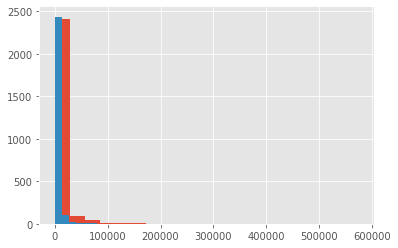

In [122]:
plt.hist(dfc.new_subscribers,bins=20);
plt.hist(dfc.old_subscribers,bins=20)

The first naive attempt does tells us a few things that are helpful in generating a more meaningful plot:

1. Most of the courses are in the lowest bin with much less than 50,000 subscribers
2. There must be a few courses with more than 250,000 subscribers listed even though we can not see them on this scale.  Otherwise the x-axis would not extend that far.
3. A log plot may at least make it possible to see these few outliers.
4. Using more histogram bins may help see the details

sum(new_subscribers)= 24702258.0
sum(old_subscribers)= 9777804


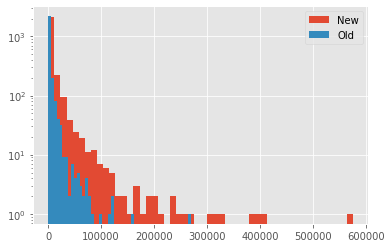

In [130]:
print("sum(new_subscribers)=",dfc.new_subscribers.sum())
print("sum(old_subscribers)=",dfc.old_subscribers.sum())
plt.yscale('log')
plt.hist(dfc.new_subscribers,bins=50, label='New')
plt.hist(dfc.old_subscribers,bins=50, label='Old')
plt.legend()
plt.show()


We can now see that there is indeed only one course with more than 250,000 subscribers which is more than 2% of all subscribers in the data set.
We also see that there are only a few others with more than 80,000.  

We can not ignore these few outliers because as few as they are, they represent a significant percentage of the total Udemy subscribers (and the corresponding enrollment and possible revenue).  However, we already know that they form their own category and need to be analyzed separately if we want our statistical analysis to have any meaning.

For now lets try to zoom in on the majority of the courses.

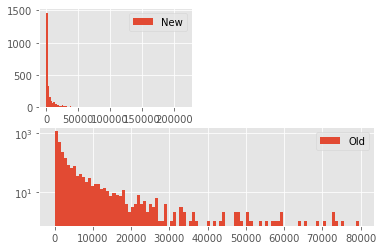

In [167]:
plt.subplot(221)
plt.hist(dfc.query("new_subscribers<230000").new_subscribers,bins=100, label='New');
plt.legend()
plt.subplot(212)
plt.hist(dfc.query("old_subscribers< 80000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

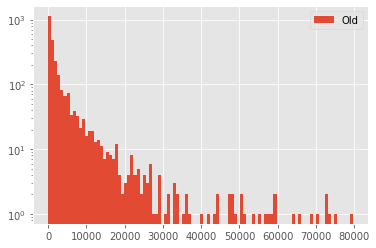

In [168]:
plt.hist(dfc.query("old_subscribers< 80000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

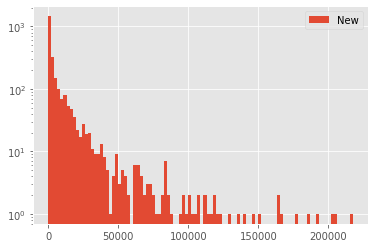

In [182]:
plt.hist(dfc.query("new_subscribers<230000").new_subscribers,bins=100, label='New');
plt.yscale('log')
plt.legend()
plt.show()

We can now see three distinct regions in the subscriber data:
1. Many courses have less than 2000 subscribers.
2. There is a middle region where a linear fit (to a log scale) might do a reasonable job of approximating the data.
3. Courses with more than 40,000 old subscribers probably belong with the best sellers.
4. Courses with more than 90,000 new subscribers probably belong with the best sellers.

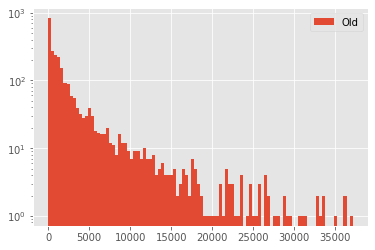

In [184]:
plt.hist(dfc.query("old_subscribers< 40000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

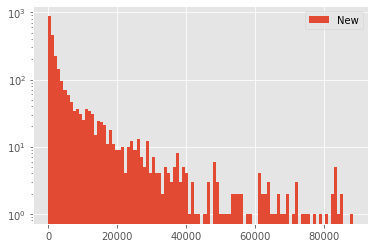

In [185]:
plt.hist(dfc.query("new_subscribers<90000").new_subscribers,bins=100, label='New');
plt.yscale('log')
plt.legend()
plt.show()

Looking for the Low thresholds based on courses with less than 1% of the total student enrollment


In [240]:
dfc[abs(dfc.cum_new_subsc-0.01)<0.0002].sort_values('new_subscribers')

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp,old_revenue,new_revenue,student_lect,lect_price,cum_new_subsc
858,714188,"Fixed Income Valuation and Analysis, CFA L2",https://www.udemy.com/fixed-income-simplified-...,True,20,50,6,12,All Levels,3.0,2016-01-04T21:01:48Z,Business Finance,OK,1.0,2.0,8.0,4.0,10.0,25.0,159.0,4/2016,51.0,79.99,47.99,40.0,2020-07-09 14:03:46,1000,12718.41,600,1.666667,0.009878
860,498360,Trading For Busy People,https://www.udemy.com/trading-for-busy-people/,True,50,99,12,26,All Levels,3.0,2015-07-06T22:22:25Z,Business Finance,OK,1.0,0.0,4.0,4.0,20.0,29.0,208.0,2/2016,53.0,199.99,119.99,40.0,2020-07-09 14:03:50,4950,41597.92,2574,1.923077,0.009960
865,729128,Professional Bookkeeping and Accounting 3: Dou...,https://www.udemy.com/professional-bookkeeping...,True,35,81,8,33,All Levels,1.0,2016-01-21T18:30:28Z,Business Finance,OK,1.0,3.0,8.0,11.0,11.0,34.0,266.0,11/2019,8.0,139.99,83.99,40.0,2020-07-09 14:04:01,2835,37237.34,2673,1.060606,0.010168
859,548044,Corporation Tax Returns UK,https://www.udemy.com/corporation-tax-returns-uk/,True,50,100,23,25,All Levels,2.0,2015-07-23T19:21:21Z,Business Finance,OK,10.0,11.0,18.0,15.0,26.0,80.0,358.0,5/2017,38.0,239.99,143.99,40.0,2020-07-09 14:03:48,5000,85916.42,2500,2.000000,0.009919
863,902888,Investment Portfolio Analysis with Python,https://www.udemy.com/investment-portfolio-ana...,True,50,209,13,37,All Levels,7.0,2016-07-13T21:40:32Z,Business Finance,OK,5.0,9.0,21.0,23.0,22.0,80.0,862.0,3/2018,28.0,99.99,59.99,40.0,2020-07-09 14:03:57,10450,86191.38,7733,1.351351,0.010085


In [202]:
cum_new_subsc=np.cumsum(dfc.new_subscribers.sort_values()).reset_index(drop=True)/dfc.new_subscribers.sum()
cum_old_subsc=np.cumsum(dfc.old_subscribers.sort_values()).reset_index(drop=True)/dfc.old_subscribers.sum()

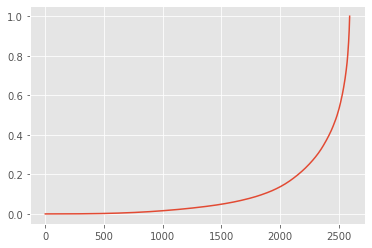

In [211]:
plt.plot(cum_new_subsc)

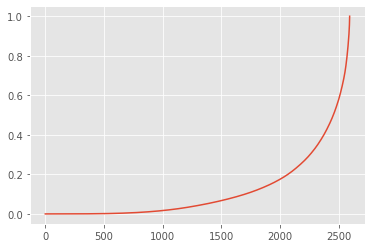

In [212]:
plt.plot(cum_old_subsc)

Tentative decision, set low threshold at 10% of all students in each data set  (1700 for old set, 1855 for new set)

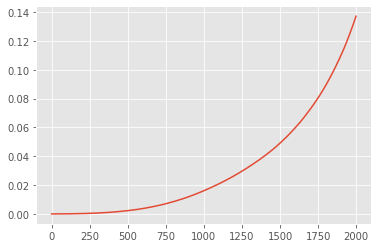

In [246]:
plt.plot(cum_new_subsc[:2000])

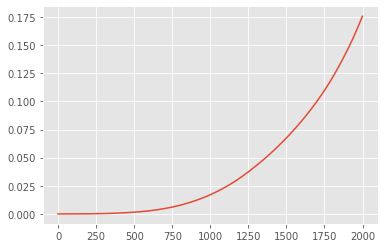

In [247]:
plt.plot(cum_old_subsc[:2000])

In [251]:
cum_new_subsc[1850:1860]

1850    0.099016
1851    0.099225
1852    0.099436
1853    0.099647
1854    0.099859
1855    0.100070
1856    0.100282
1857    0.100494
1858    0.100706
1859    0.100920
Name: new_subscribers, dtype: float64

In [253]:
cum_old_subsc[1700:1710]

1700    0.099939
1701    0.100126
1702    0.100314
1703    0.100502
1704    0.100691
1705    0.100879
1706    0.101068
1707    0.101257
1708    0.101447
1709    0.101636
Name: old_subscribers, dtype: float64

Questions:
What is the num_subscribers for the course at the threshold (for each data set)?

How do these threshold affect the results in terms of transitions between categories?

How do these thresholds correlate with cumulative revnues?



With the log scale removed, the area under the histogram might tells us something meaningful about the distribution of course sizes.  But we are not there yet ...

We know from the earlier log plot that there are more than 10 courses with at least 30,000 subscribers each that are drowned out by the vertical scale of this plot.

Let's take a closer look at the courses on the lower end of the subscriber numbers that are drowning out our real data.  There may be a large number of these courses but with their low attentance they represent only a small portion of the student population:

sum(old_subscribers<= 2000 ):  1413375
sum(old_subscribers    )=  11715835
Number of courses with old_subscribers<  20:  438
Number of courses with old_subscribers<= 2000 ):  2561
Number of courses                          : 3672


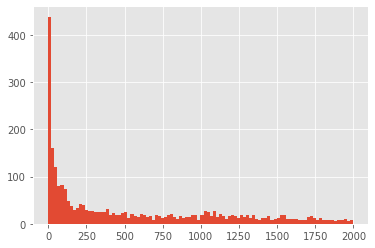

In [269]:
thr = 2000
print("sum(old_subscribers<=",thr,'): ', df.query("old_subscribers<"+str(thr)).old_subscribers.sum())
print("sum(old_subscribers    )= ",                                 df.old_subscribers.sum())
plt.hist(df.query("old_subscribers<@thr").old_subscribers,bins=100);
print("Number of courses with old_subscribers<  20: ",df.query("old_subscribers< 20").shape[0])
print("Number of courses with old_subscribers<=",thr,'): ',df.query("old_subscribers<"+str(thr)).shape[0])
print("Number of courses                          :",                              df.shape[0])


Let's plot the cumulative number of subscribers when we sort the data:

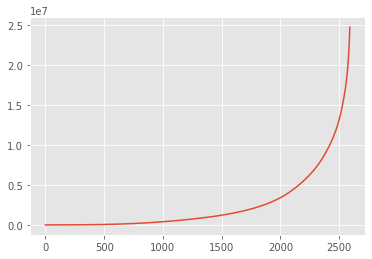

In [170]:
Sorted_subsc = dfc.new_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

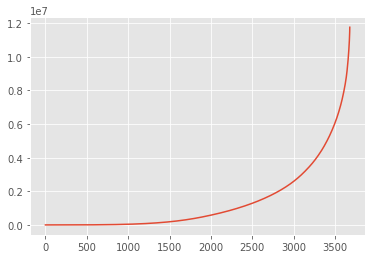

In [ ]:
Sorted_subsc = df.num_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

In [174]:
dfc[dfc.old_subscribers>30000].count()

course_id          48
title              48
url                48
is_paid            48
old_price          48
old_subscribers    48
num_reviews        48
num_lectures       48
level              48
duration           48
old_pub_date       48
subject            48
status             48
rating1            32
rating2            32
rating3            32
rating4            32
rating5            32
rating_tot         32
new_subscribers    48
new_pub_date       48
upd_month          32
new_price          48
curr_price         48
discount           48
timestamp          48
old_revenue        48
new_revenue        48
student_lect       48
lect_price         48
dtype: int64

We see that the lower 3000 courses (about 80% of the courses) have fewer than 25% of the total subscribers.  Most of the subscribers are enrolled in the top 20% of courses (in terms of popularity) - which should not be surprising.  What it does tell us is that we need to be careful in applying statistical tools like averages and medians which are meaningless in this type of data.

In [ ]:
piv = (df.pivot_table(index='subject', columns='num_subscribers',values='course_id', aggfunc = 'count')).T
piv

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
num_subscribers,,,,
0,40.0,19.0,11.0,NaN
1,17.0,21.0,11.0,NaN
2,13.0,9.0,5.0,NaN
3,6.0,10.0,10.0,NaN
4,11.0,7.0,8.0,NaN
...,...,...,...,...
114512,NaN,NaN,NaN,1.0
120291,NaN,NaN,NaN,1.0
121584,NaN,NaN,NaN,1.0


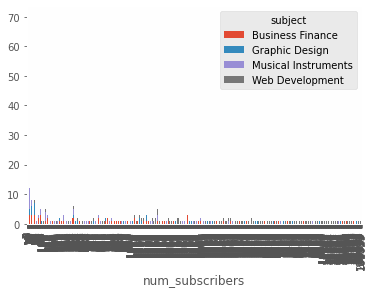

In [ ]:
piv.plot(kind='bar',stacked=True)
plt.show()

In [ ]:
piv.hist(df.query("num_subscribers<100").num_subscribers,bins=100);

KeyError: ignored